In [1]:
import pandas as pd
import numpy as np
# graphics
import matplotlib.pyplot as plt
import seaborn as sns
# custom functions
from utils.data_processing import data_preprocessing, remove_extreme_values, split_data
from utils.data_plotting import plot_bar_chart, plot_hist, plot_box, plot_violin, plot_hist_by_group, plot_missing_values
# Generalized Linear Models Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Competition Performance metric
from sklearn.metrics import mean_absolute_error

In [2]:
# render plots in LaTeX
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 18,  # Adjust the font size as needed
    "axes.labelsize": 20,
    "axes.titlesize": 22,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
})

In [3]:
# import data from .csv
path_to_data = 'data/train.csv'
data = pd.read_csv(path_to_data)

# output directory to story plots
output_dir = "outputs/EDA/plots/"

In [4]:
indentifiers = ['stock_id', 'date_id', 'time_id', 'row_id']
discrete     = ['imbalance_size', 'stock_id', 'seconds_in_bucket']
numerical    = ['imbalance_size', 'reference_price', 'matched_size', 'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap', 'target']

In [5]:
data.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [6]:
data[numerical].describe()

,imbalance_size,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target
count,5.237760e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06
mean,5.715293e+06,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02
std,2.051591e+07,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00
min,0.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02
25%,8.453415e+04,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00
50%,1.113604e+06,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02
75%,4.190951e+06,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00
max,2.982028e+09,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,3.028784e+07,1.077836e+00,5.440500e+07,1.077675e+00,4.460704e+02


In [7]:
imbalance = data[['imbalance_buy_sell_flag']].groupby('imbalance_buy_sell_flag').value_counts()

In [8]:
imbalance

imbalance_buy_sell_flag
-1    2084349
 0    1131594
 1    2022037
Name: count, dtype: int64

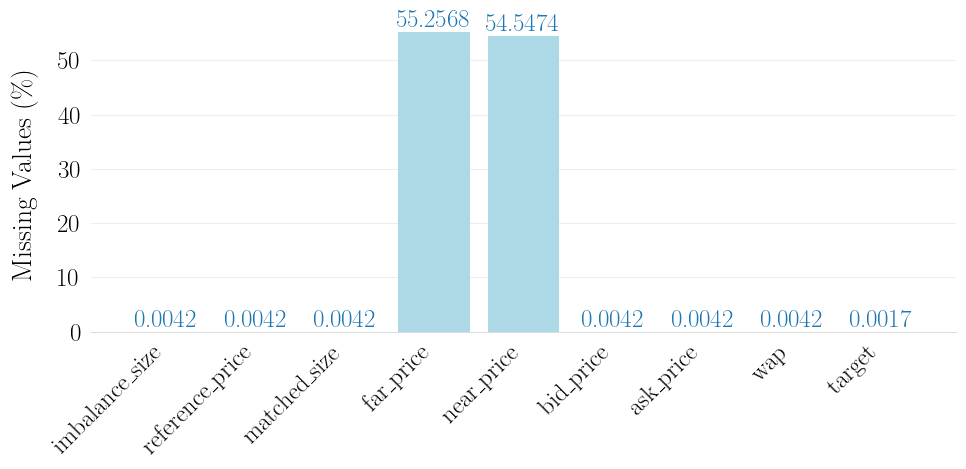

In [9]:
plot_missing_values(data, save=True, output_dir=output_dir)

### Variable Correlation

Compute Pearson correlation between all numerical variables

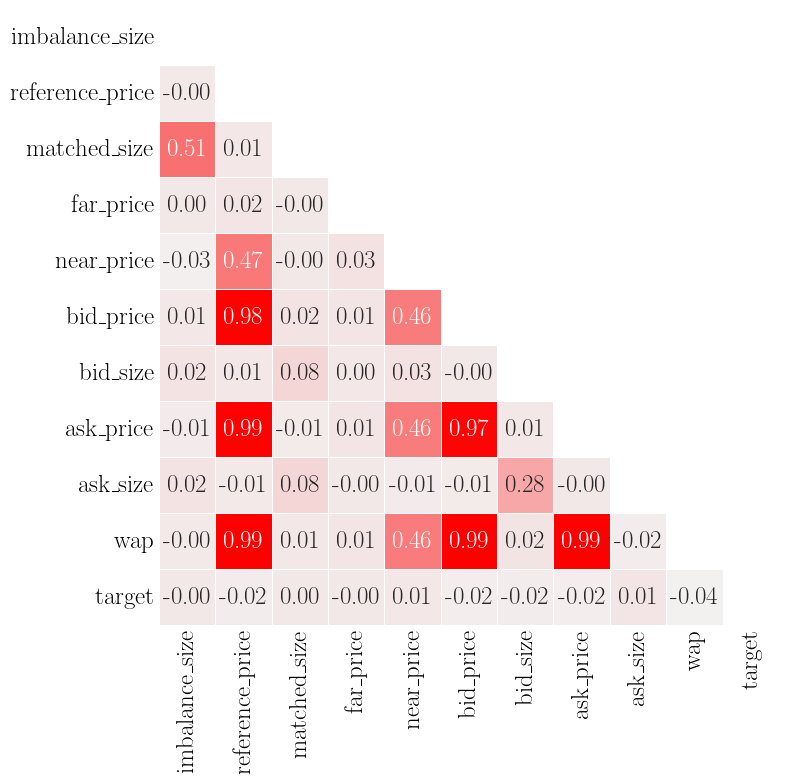

In [10]:
#sns.set_style(style='white')

# Compute the correlation matrix
corr_matrix = data[numerical].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Specify custom color map without diverging effect
cmap = sns.light_palette("red", as_cmap=True)

# Draw the lower triangle heatmap with custom color map
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=.5, cbar=False, annot_kws={'weight': 'bold', 'fontsize': 18})

# Remove small ticks
plt.tick_params(axis='both', which='both', length=0)

plt.savefig(output_dir + 'correlation.pdf', bbox_inches='tight')

# Show the plot
plt.show()

## Variable Distributions

### Categorical

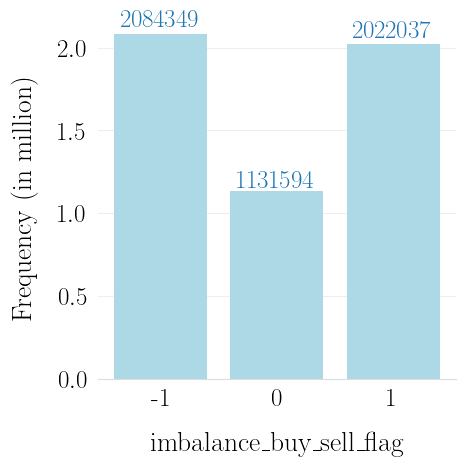

In [11]:
plot_bar_chart(imbalance, 'imbalance_buy_sell_flag', save=True, output_dir=output_dir)

### Target Variable

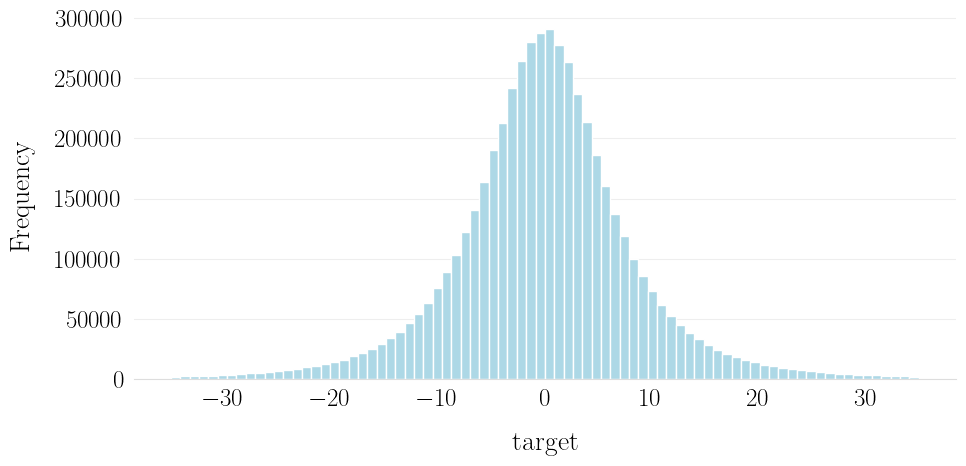

In [12]:
# plt.style.use('default')
plot_hist(data, 
          'target', 
          figsize=(10, 5), 
          lims=(-35, 35), 
          bins=80, 
          save=True, 
          output_dir=output_dir)

In [13]:
# plot_hist_by_group(data, 'target', 'stock_id')

## Numerical Variables

### Histograms

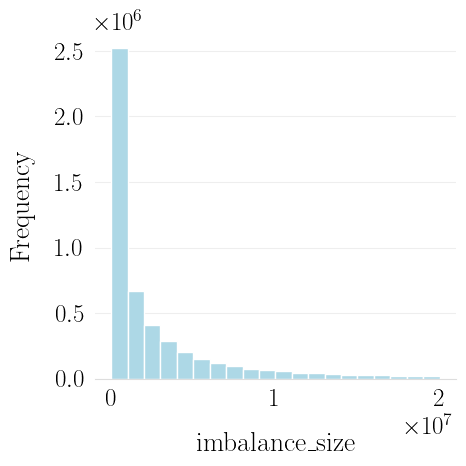

In [14]:
plot_hist(data, numerical[0], lims=(0, 2e7), bins=20, save=True, output_dir=output_dir)

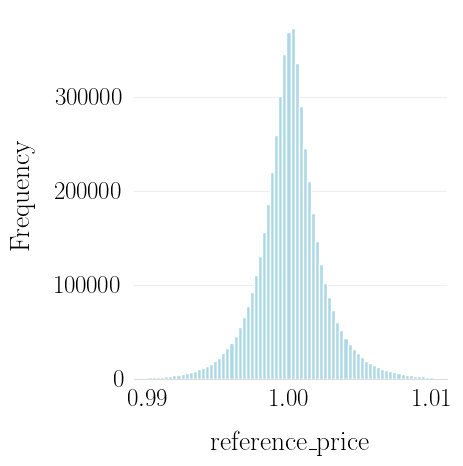

In [15]:
plot_hist(data, numerical[1], lims=(0.99, 1.01), bins=70, save=True, output_dir=output_dir)

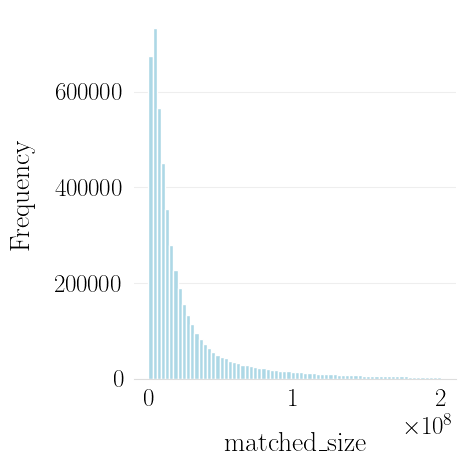

In [16]:
plot_hist(data, numerical[2], lims=(0, 2e8), bins=70, save=True, output_dir=output_dir)

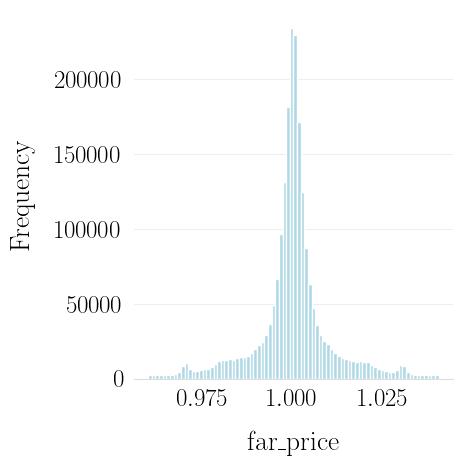

In [17]:
plot_hist(data, numerical[3], lims=(0.96, 1.04), bins=80, save=True, output_dir=output_dir)

In [18]:
# plot_hist_by_group(data, 'far_price', 'stock_id')

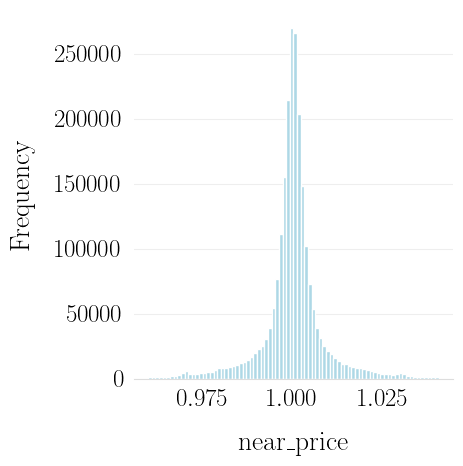

In [19]:
plot_hist(data, numerical[4], lims=(0.96, 1.04), bins=80, save=True, output_dir=output_dir)

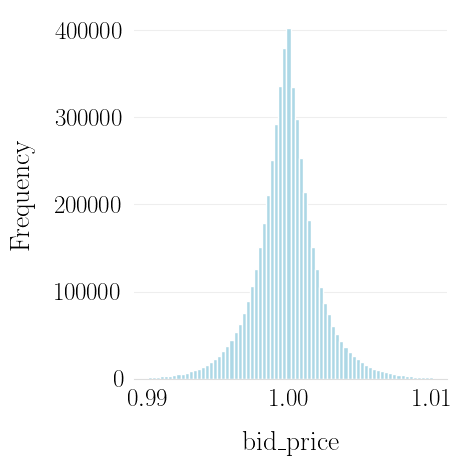

In [20]:
plot_hist(data, numerical[5], lims=(0.99, 1.01), bins=70, save=True, output_dir=output_dir)

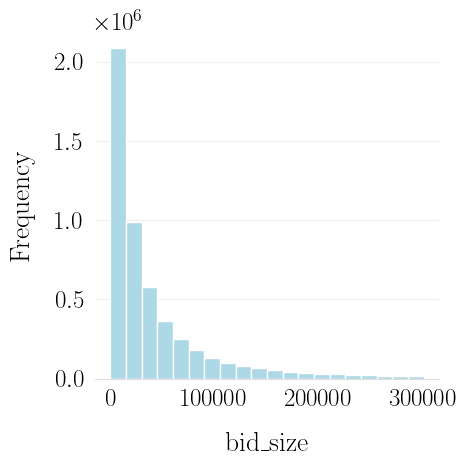

In [21]:
plot_hist(data, numerical[6], lims=(0, 3e5), bins=20, save=True, output_dir=output_dir)

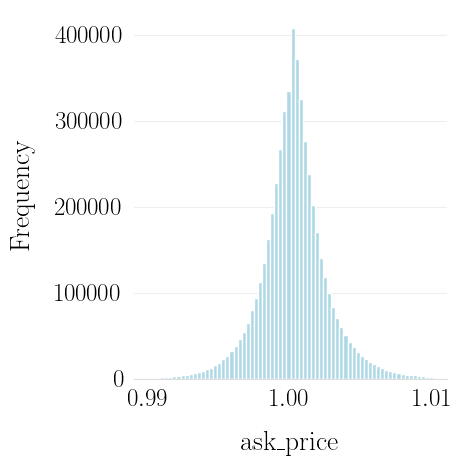

In [22]:
plot_hist(data, numerical[7], lims=(0.99, 1.01), bins=70, save=True, output_dir=output_dir)

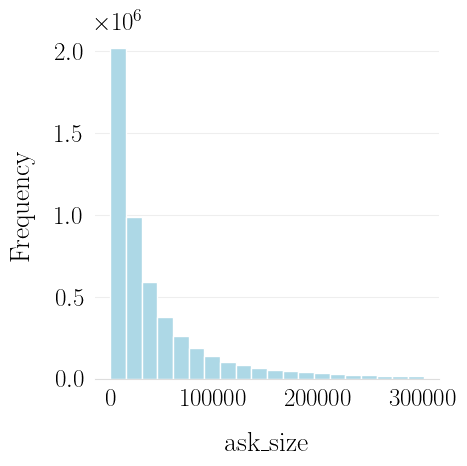

In [23]:
plot_hist(data, numerical[8], lims=(0, 3e5), bins=20, save=True, output_dir=output_dir)

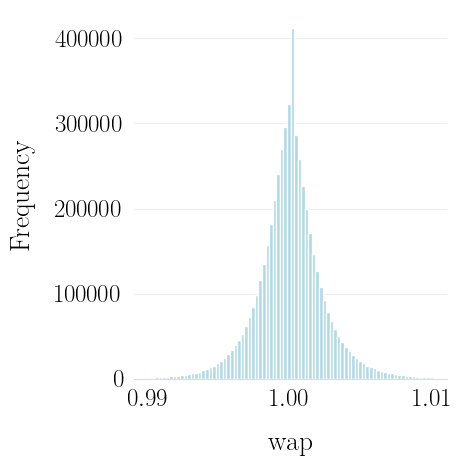

In [24]:
plot_hist(data, numerical[9], lims=(0.99, 1.01), bins=80, save=True, output_dir=output_dir)

### Boxplots

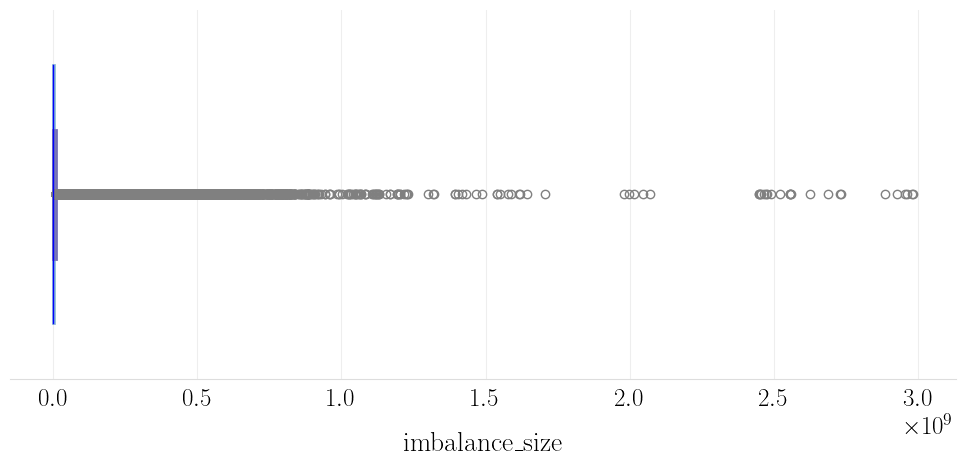

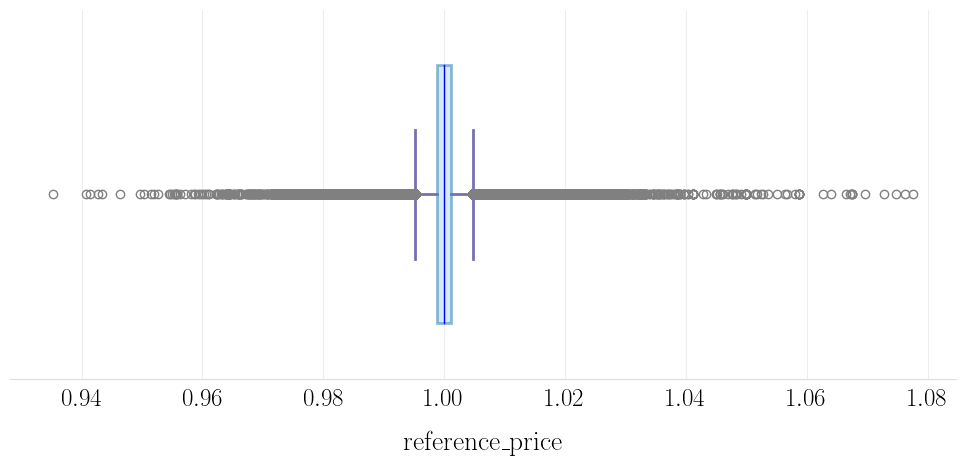

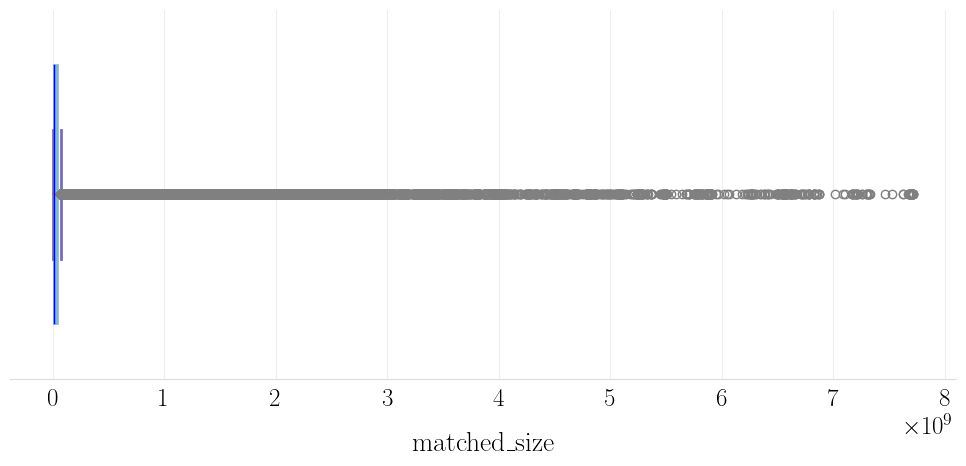

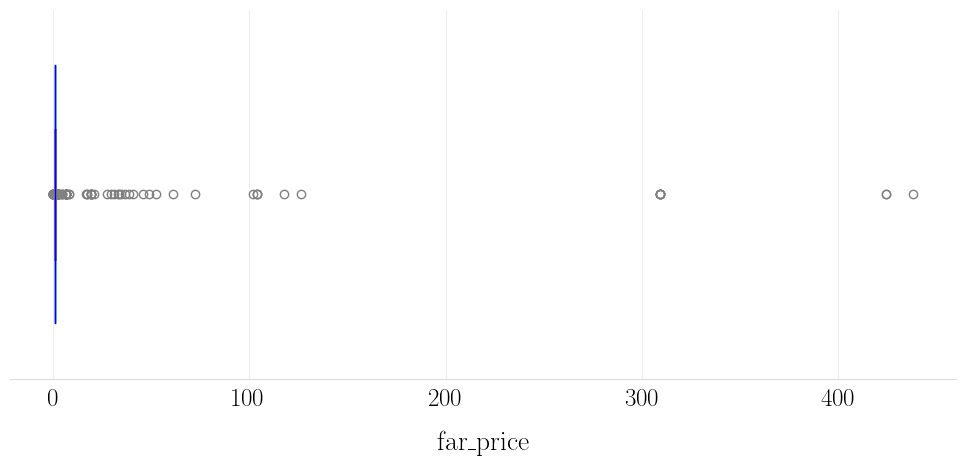

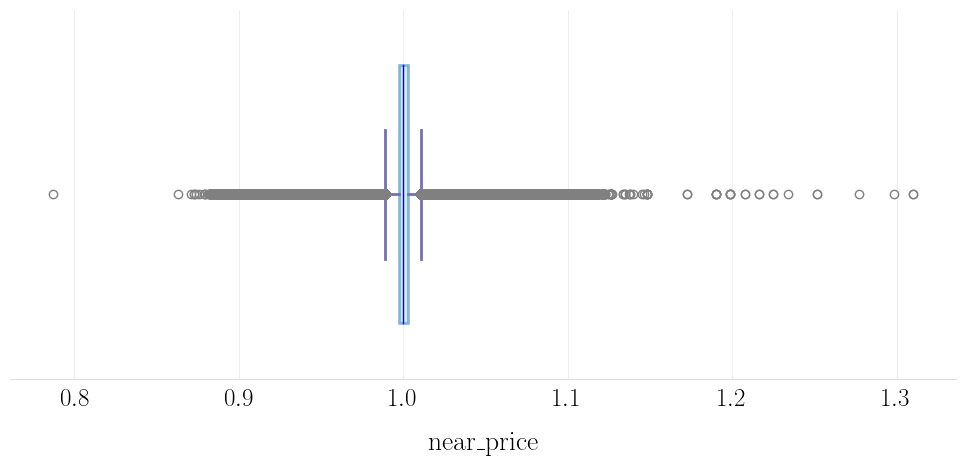

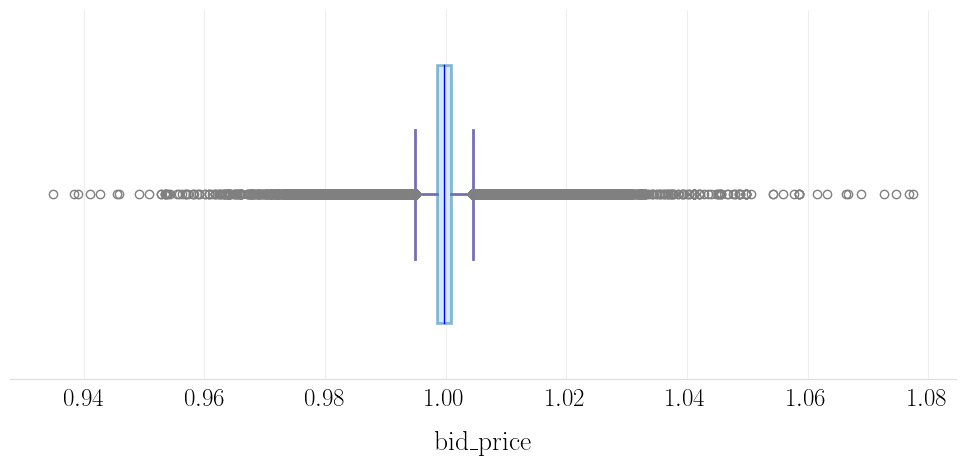

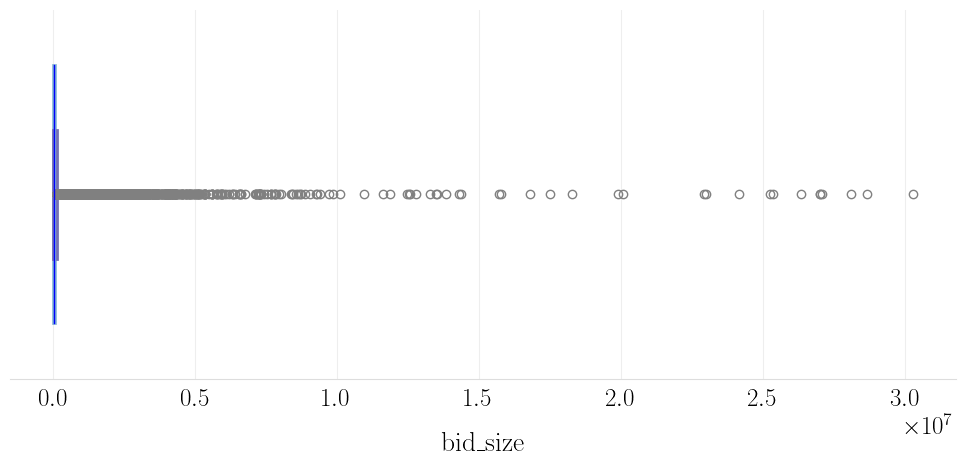

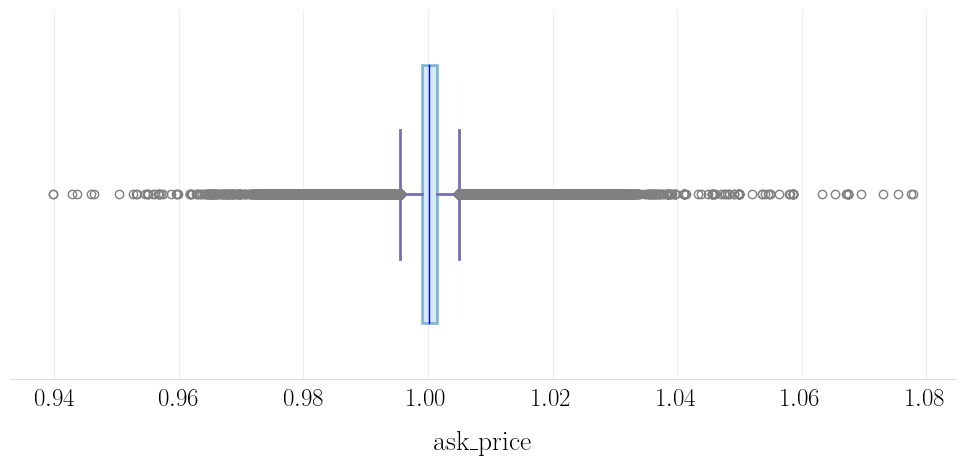

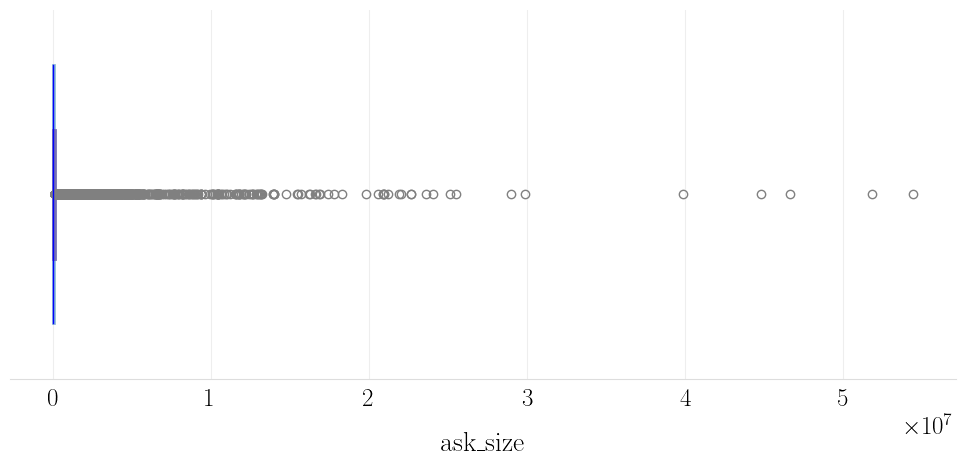

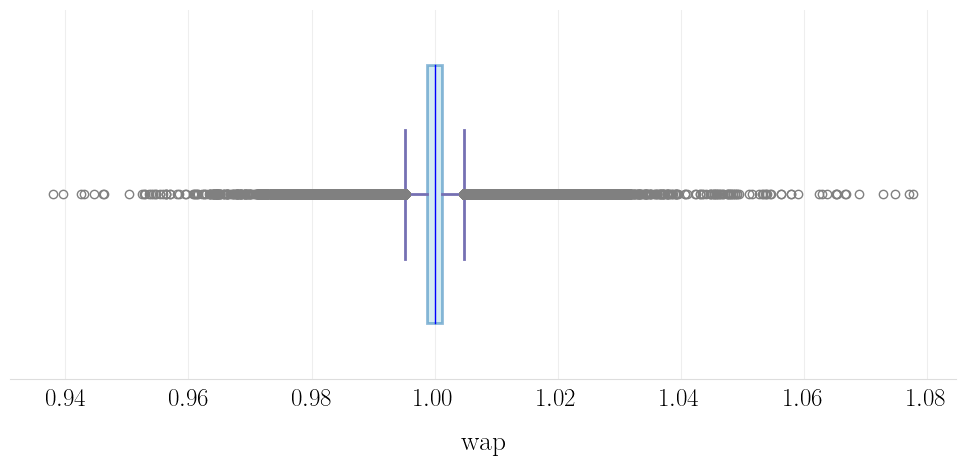

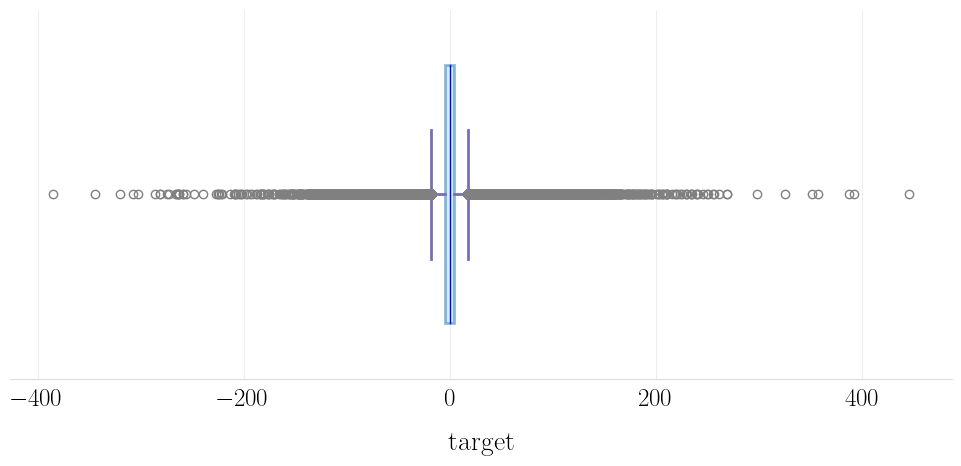

In [25]:
for variable in numerical:
    plot_box(data, variable, save=True, figsize=(10, 5), output_dir=output_dir)